In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

read data

In [5]:
data = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1) Dalam rata-rata, payment method mana yang memiliki monthly charge terbesar per customernya?

Hint:
Gunakan groupby payment method terhadap monthly charge dengan aggregate function rata-rata

In [6]:
mean_monthly = data.groupby(by="PaymentMethod")["MonthlyCharges"].mean()
mean_monthly

PaymentMethod
Bank transfer (automatic)    67.192649
Credit card (automatic)      66.512385
Electronic check             76.255814
Mailed check                 43.917060
Name: MonthlyCharges, dtype: float64

In [7]:
max_value = mean_monthly.idxmax()
max_value

'Electronic check'

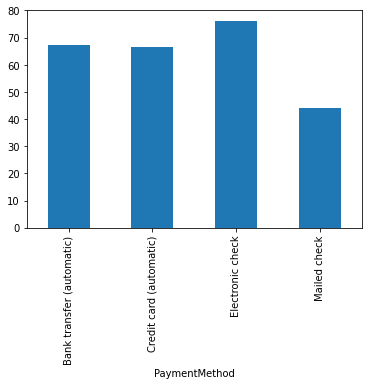

In [8]:
mean_monthly.plot(kind = 'bar')

Dari hasil bar chart yang didapatkan dapat dianalisis bahwa rata - rata payment method terbesar berdasarkan monthly charges adalah pada electronic check.

2) Bagaimana jumlah customer dilihat dari tenure group?

Tenure group:
- low_tenure: User dengan tenure < 21 bulan
- medium_tenure: User dengan tenure 21 - 40 bulan
- high_tenure: User dengan tenure > 40 bulan


Hint:
- Memotong data integer menjadi group categorical dapat menggunakan beberapa macam cara, contohnya dengan numpy.where atau pandas.cut
- Mirip dengan plot pertama, namun ini menghitung jumlah unique users

In [9]:
tenure = data['tenure']
tenure.max()

72

In [10]:
data['status'] = pd.cut(x=data['tenure'],bins =[0,20,40,73],labels=['low_tenure','medium_tenure','high_tenure'])
data['status']

0          low_tenure
1       medium_tenure
2          low_tenure
3         high_tenure
4          low_tenure
            ...      
7038    medium_tenure
7039      high_tenure
7040       low_tenure
7041       low_tenure
7042      high_tenure
Name: status, Length: 7043, dtype: category
Categories (3, object): ['low_tenure' < 'medium_tenure' < 'high_tenure']

In [11]:
data.groupby(by='status')['tenure'].agg('count')

status
low_tenure       2867
medium_tenure    1408
high_tenure      2757
Name: tenure, dtype: int64

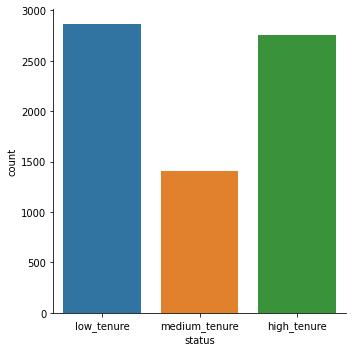

In [12]:
sns.catplot(x='status',kind='count',data=data)

Dari hasil bar chart yang didapatkan dapat dianalisis bahwa jumlah tertinggi status adalah low tenure dan jumlah terendah status adalah medium tenure.

3) Apakah kebanyakan dari Senior Citizen berlangganan PhoneService?


Hint:
- Dapat menggunakan feature/input parameter hue pada seaborn
- Dalam menghitung jumlah unique customer, jangan lupa
perhatikan angka rasio, tidak hanya angka absolutnya

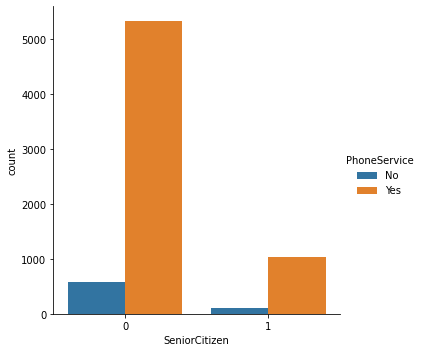

In [13]:
sns.catplot(x='SeniorCitizen', hue='PhoneService',kind='count',data=data)

Dari hasil bar chart yang didapatkan dapat dianalisis bahwa senior citizen kebanyakn berlangganan phone service

Bagaimana Distribusi dari TotalCharge?


Hint:
- Ubah datatype TotalCharge dari object ke int atau float
- Buat distribusi plot!

In [14]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dtypes

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
status              category
dtype: object

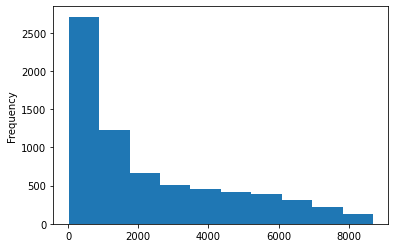

In [15]:
data['TotalCharges'].plot(kind='hist')